In [171]:
import importlib
import funciones_analisis.estadisticas

importlib.reload(funciones_analisis.estadisticas)
importlib.reload(funciones_analisis.generales)

from funciones_analisis.estadisticas import *
from funciones_analisis.generales import *
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch, Pitch
from highlight_text import ax_text, fig_text
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
import seaborn as sns
import glob
from mplsoccer import Radar
import numpy as np
from urllib.request import urlopen

from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

from scipy import stats
import math

In [172]:
URL3 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-Medium.ttf?raw=true'
catamaran2 = FontManager(URL3)
URL = 'https://github.com/google/fonts/blob/main/ofl/fjallaone/FjallaOne-Regular.ttf?raw=true'
robotto_regular = FontManager(URL)
URL2 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-ExtraBold.ttf?raw=true'
catamaran = FontManager(URL2)


In [173]:
free_comps = sb.competitions()

free_comps[free_comps["competition_name"] == "Women's World Cup"]


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596
73,72,30,International,Women's World Cup,female,False,True,2019,2024-02-13T09:41:26.379767,2021-06-13T16:17:31.694,None,2024-02-13T09:41:26.379767


In [174]:
# Extraer únicos con país y si es internacional
df_unique = free_comps[['competition_name', 'country_name']].drop_duplicates()

# Ordenar por nombre
df_unique = df_unique.sort_values('competition_name')

# Guardar resultado
#df_unique.to_csv("datos/otros/competitions_with_country.csv", index=False)


In [175]:
!pip install pillow


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [176]:
from PIL import Image
import os

# Ruta a la carpeta de imágenes
carpeta = "imagenes/competiciones_statsbomb"

# Parámetros
max_ancho, max_alto = 180, 180
espaciado = 30
layout = [3, 5, 5, 5, 3]  # Distribución por fila

# Cargar y escalar imágenes proporcionalmente
imagenes = []
for archivo in sorted(os.listdir(carpeta)):
    if archivo.lower().endswith(('.png', '.jpg', '.jpeg')):
        ruta = os.path.join(carpeta, archivo)
        img = Image.open(ruta).convert("RGBA")
        img.thumbnail((max_ancho, max_alto), Image.LANCZOS)
        imagenes.append(img)

# Comprobamos que tenemos el número correcto de imágenes
total_necesario = sum(layout)
if len(imagenes) != total_necesario:
    raise ValueError(f"Se esperaban {total_necesario} imágenes, pero hay {len(imagenes)}.")

# Calcular dimensiones del collage
ancho_max = max(layout) * max_ancho + (max(layout) + 1) * espaciado
alto_total = len(layout) * max_alto + (len(layout) + 1) * espaciado

# Crear lienzo blanco
collage = Image.new("RGBA", (ancho_max, alto_total), (255, 255, 255, 255))

# Pegar imágenes según layout
indice = 0
for fila_idx, num_col in enumerate(layout):
    y = espaciado + fila_idx * (max_alto + espaciado)

    # Calcular margen izquierdo para centrar
    fila_ancho = num_col * max_ancho + (num_col - 1) * espaciado
    margen_izq = (ancho_max - fila_ancho) // 2

    for col in range(num_col):
        img = imagenes[indice]
        x = margen_izq + col * (max_ancho + espaciado)

        # Centrar dentro del recuadro
        x_offset = x + (max_ancho - img.width) // 2
        y_offset = y + (max_alto - img.height) // 2

        collage.paste(img, (x_offset, y_offset), img)
        indice += 1

# Guardar collage final
#collage.save("imagenes/collage_distribucion_personalizada.png")
print("✅ Collage guardado como collage_distribucion_personalizada.png")


✅ Collage guardado como collage_distribucion_personalizada.png


In [254]:
# Cargar datos
df_percentil = pd.read_csv("datos/normalizaciones_posicion/percentiles/total_percentil.csv")
df_total = pd.read_csv("datos/datos_jugadores_v4/jugadores_total.csv")
df_minmax = pd.read_csv("datos/normalizaciones_posicion/minmax/total_minmax.csv")

In [178]:
porteros_plot = df_percentil[["player_name", "saves_per90", "save_percentage","xg_against_minus_goals_conceded_per90", "keeper_sweeper_per90", "penalty_save_percentage", "aerial_dominance_index_per90", "progressive_passes_per90", "pass_completion_rate"]]
centrales_plot = df_percentil[["player_name", "tackles_successful_per90", "interceptions_per90", "clearances_per90", 
                    "blocks_per90", "times_dribbled_past_per90", "progressive_passes_per90", "duel_success_rate", "goals_scored_per90"]]
laterales_plot = df_percentil[["player_name", "interception_success_rate", "pressures_per90", "duels_won_per90", "tackles_successful_per90", "progressive_carries_per90", "chances_created_per90", "goals_scored_per90", "fouls_committed_per90"]]
centrocampistas_defensivo_plot = df_percentil[["player_name", "ball_recoveries_per90", "duels_won_per90", "duel_success_rate", "interceptions_per90", "pass_completion_rate", "progressive_passes_per90", "chances_created_per90", "fouls_committed_per90"]]
centrocampistas_plot = df_percentil[["player_name", "duels_won_per90", "pressures_per90", "dribble_success_rate", "pass_completion_rate", "progressive_passes_per90", "chances_created_per90", "goal_assists_per90", "goals_scored_per90"]]
centrocampistas_ofensivo_plot = df_percentil[["player_name", "pass_completion_rate", "goal_assists_per90", "chances_created_per90", "dribbles_completed_per90", "dribble_success_rate", "progressive_passes_per90", "fouls_won_per90", "goals_scored_per90"]]
extremos_plot = df_percentil[["player_name", "dribbles_completed_per90", "dribble_success_rate", "progressive_carries_per90", "chances_created_per90", "goal_assists_per90", "goals_scored_per90", "goals_minus_xg_per90", "fouls_won_per90"]]
delanteros_plot = df_percentil[["player_name", "goals_scored_per90", "goals_minus_xg_per90", "headed_shot_duel_rate", "dribbles_completed_per90", "chances_created_per90", "goal_assists_per90", "pass_completion_rate", "fouls_won_per90"]]

# Definir mapeo de etiquetas
etiquetas_posiciones = {
        "goalkeeper": ["Goalkeeper"],
        "center_back": ['Center Back', 'Right Center Back', 'Left Center Back'],
        "side_back": ['Left Back', 'Right Back', 'Right Wing Back', 'Left Wing Back'],
        "defensive_midfield": ['Right Defensive Midfield', 'Center Defensive Midfield', 'Left Defensive Midfield'],
        "center_midfield": ['Right Center Midfield', 'Center Midfield', 'Left Center Midfield'],
        "offensive_midfield": ['Left Attacking Midfield', 'Center Attacking Midfield', 'Right Attacking Midfield'],
        "winger": ['Left Wing', 'Left Midfield', 'Right Wing', 'Right Midfield'],
        "striker": ['Center Forward', 'Secondary Striker', 'Left Center Forward', 'Right Center Forward']
    }


In [179]:
#habria que hacer los demas

params_centrales = [
    "Tackles exitosos /90",
    "Intercepciones /90",
    "Despejes /90",
    "Bloqueos /90",
    "Regates sufridos /90",
    "Pases progresivos /90",
    "Éxito en duelos %",
    "Goles /90"
]


In [180]:
player = "Aymeric Laporte"
row = df_percentil[df_percentil["player_name"] == player].iloc[0]
team = row["team"]
rating = round(row["rating"], 2)
row2 = df_total[df_total["player_name"] == player].iloc[0]
market_value = row2["value_eur"]


KeyError: 'rating'

In [ ]:
jugador = list(centrales_plot[centrales_plot['player_name'] == player].iloc[0].values[1:])
values = [round(x, 2) for x in jugador]
values

[60.33, 58.68, 11.16, 39.88, 70.45, 87.19, 51.03, 92.77]

In [ ]:
# color for the slices and text
slice_colors = ["#1A78CF"] * 3 + ["#FF9300"] * 3 + ['lightblue'] * 2
text_colors = ["#F2F2F2"] * 3 + ["#000000"] * 3 + ["#F2F2F2"] * 2

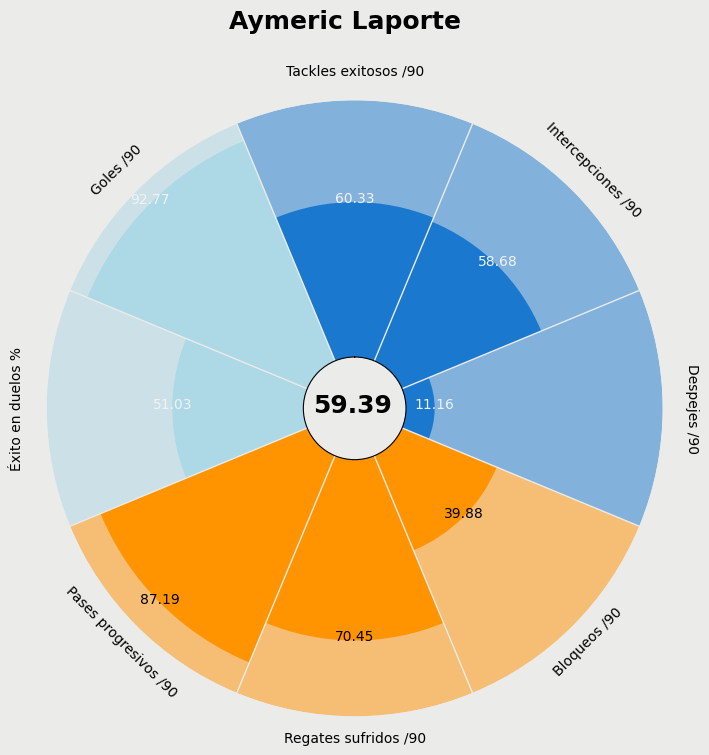

In [ ]:
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)


# Crear figura
fig, ax = baker.make_pizza(
    values,
    figsize=(8, 8),
    color_blank_space="same",
    slice_colors=slice_colors,
    value_colors=text_colors,
    param_location=110  # puedes ajustar la posición de los labels
)

# Título con nombre y rating
rating = round(row["rating"], 2) if "rating" in row else "N/A"
fig.text(0.51, 0.49, f"{rating}", size=18, weight='bold', ha='center')

# Título
fig.text(0.5, 0.97, player, size=18, weight='bold', ha='center')

plt.show()


In [258]:
from mplsoccer import PyPizza
import matplotlib.pyplot as plt

def pizza_radar_jugador(player_name, df_percentils, df_total):
    # Diccionario de etiquetas por rol
    etiquetas_posiciones = {
        "goalkeeper": ["Goalkeeper"],
        "center_back": ['Center Back', 'Right Center Back', 'Left Center Back'],
        "side_back": ['Left Back', 'Right Back', 'Right Wing Back', 'Left Wing Back'],
        "defensive_midfield": ['Right Defensive Midfield', 'Center Defensive Midfield', 'Left Defensive Midfield'],
        "center_midfield": ['Right Center Midfield', 'Center Midfield', 'Left Center Midfield'],
        "offensive_midfield": ['Left Attacking Midfield', 'Center Attacking Midfield', 'Right Attacking Midfield'],
        "winger": ['Left Wing', 'Left Midfield', 'Right Wing', 'Right Midfield'],
        "striker": ['Center Forward', 'Secondary Striker', 'Left Center Forward', 'Right Center Forward']
    }

        # Mapear cada tipo de posición a columnas y etiquetas del radar
    radar_config = {
        "goalkeeper": (
            ["saves_per90", "save_percentage", "xg_against_minus_goals_conceded_per90",
            "keeper_sweeper_per90", "penalty_save_percentage", "aerial_dominance_index_per90",
             "pass_completion_rate"],
            ["Paradas /90", "Porcentaje paradas", "xG - Goles /90", "Sweeper /90", "Penaltis detenidos %",
            "Dominio aéreo", "Precisión pase %"]
        ),
        "center_back": (
            ["tackles_successful_per90", "interceptions_per90", "clearances_per90",
            "blocks_per90", "times_dribbled_past_per90", "progressive_passes_per90",
            "duel_success_rate", "goals_scored_per90"],
            ["Tackles exitosos /90", "Intercepciones /90", "Despejes /90", "Bloqueos /90", "Regates sufridos /90",
            "Pases progresivos /90", "Duelos ganados %", "Goles /90"]
        ),
        "side_back": (
            ["interception_success_rate", "pressures_per90", "duels_won_per90", "tackles_successful_per90",
            "progressive_carries_per90", "chances_created_per90", "goals_scored_per90", "fouls_committed_per90"],
            ["Intercepciones %", "Presiones /90", "Duelos ganados /90", "Tackles exitosos /90",
            "Conducciones progresivas /90", "Ocasiones creadas /90", "Goles /90", "Faltas cometidas /90"]
        ),
        "defensive_midfield": (
            ["ball_recoveries_per90", "duels_won_per90", "duel_success_rate", "interceptions_per90",
            "pass_completion_rate", "progressive_passes_per90", "chances_created_per90", "fouls_committed_per90"],
            ["Recuperaciones /90", "Duelos ganados /90", "Duelos ganados %", "Intercepciones /90",
            "Precisión pase %", "Pases progresivos /90", "Ocasiones creadas /90", "Faltas cometidas /90"]
        ),
        "center_midfield": (
            ["duels_won_per90", "pressures_per90", "dribble_success_rate", "pass_completion_rate",
            "progressive_passes_per90", "chances_created_per90", "goal_assists_per90", "goals_scored_per90"],
            ["Duelos ganados /90", "Presiones /90", "Éxito regate %", "Precisión pase %",
            "Pases progresivos /90", "Ocasiones creadas /90", "Asistencias /90", "Goles /90"]
        ),
        "offensive_midfield": (
            ["pass_completion_rate", "goal_assists_per90", "chances_created_per90", "dribbles_completed_per90",
            "dribble_success_rate", "progressive_passes_per90", "fouls_won_per90", "goals_scored_per90"],
            ["Precisión pase %", "Asistencias /90", "Ocasiones creadas /90", "Regates completados /90",
            "Éxito regate %", "Pases progresivos /90", "Faltas recibidas /90", "Goles /90"]
        ),
        "winger": (
            ["dribbles_completed_per90", "dribble_success_rate", "progressive_carries_per90", "chances_created_per90",
            "goal_assists_per90", "goals_scored_per90", "goals_minus_xg_per90", "fouls_won_per90"],
            ["Regates completados /90", "Éxito regate %", "Conducciones progresivas /90", "Ocasiones creadas /90",
            "Asistencias /90", "Goles /90", "Goles - xG /90", "Faltas recibidas /90"]
        ),
        "striker": (
            ["goals_scored_per90", "goals_minus_xg_per90", "headed_shot_duel_rate", "dribbles_completed_per90",
            "chances_created_per90", "goal_assists_per90", "pass_completion_rate", "fouls_won_per90"],
            ["Goles /90", "Goles - xG /90", "Duelos aéreos %", "Regates completados /90", "Ocasiones creadas /90",
            "Asistencias /90", "Precisión pase %", "Faltas recibidas /90"]
        )
    }

    # Obtener fila del jugador
    row = df_total[df_total["player_name"] == player_name].iloc[0]
    position_label = row["main_position"]
    team = row["team"]
    rating = round(float(row["rating"]), 2) if str(row["rating"]).replace('.', '', 1).isdigit() else "S.V"
    market_value = row["value_eur"] / 1000000


    # Determinar rol del jugador
    rol = None
    for key, etiquetas in etiquetas_posiciones.items():
        if position_label in etiquetas:
            rol = key
            break
    if rol not in radar_config:
        raise ValueError(f"No se ha definido radar para la posición: {position_label} (rol: {rol})")

    columnas, labels = radar_config[rol]

    # Extraer percentiles del DataFrame de percentiles
    valores = df_percentils[df_percentils["player_name"] == player_name][columnas].iloc[0].tolist()
    valores = [round(v, 2) for v in valores]

    # Colores
    slice_colors = ["#1A78CF"] * 3 + ["#FF9300"] * 3 + ["#D70232"] * (len(valores) - 6)
    text_colors = ["#F2F2F2"] * 3 + ["#000000"] * 3 + ["#F2F2F2"] * (len(valores) - 6)

    # Crear radar
    baker = PyPizza(
        params=labels,
        background_color="#EBEBE9",
        straight_line_color="#EBEBE9",
        straight_line_lw=1,
        last_circle_lw=0,
        other_circle_lw=0,
        inner_circle_size=20
    )

    fig, ax = baker.make_pizza(
        valores,
        figsize=(8, 8),
        color_blank_space="same",
        slice_colors=slice_colors,
        value_colors=text_colors,
        param_location=110
    )

    # Título y rating en el centro
    fig.text(0.5, 0.97, f"{player_name} - {team}", size=18, weight='bold', ha='center')
    fig.text(0.5, 0.94, f"Market value: {market_value} M€", size=12, weight='semibold', ha='center')
    fig.text(0.5125, 0.485, f"{rating}", size=18, weight='bold', ha='center')

    plt.show()


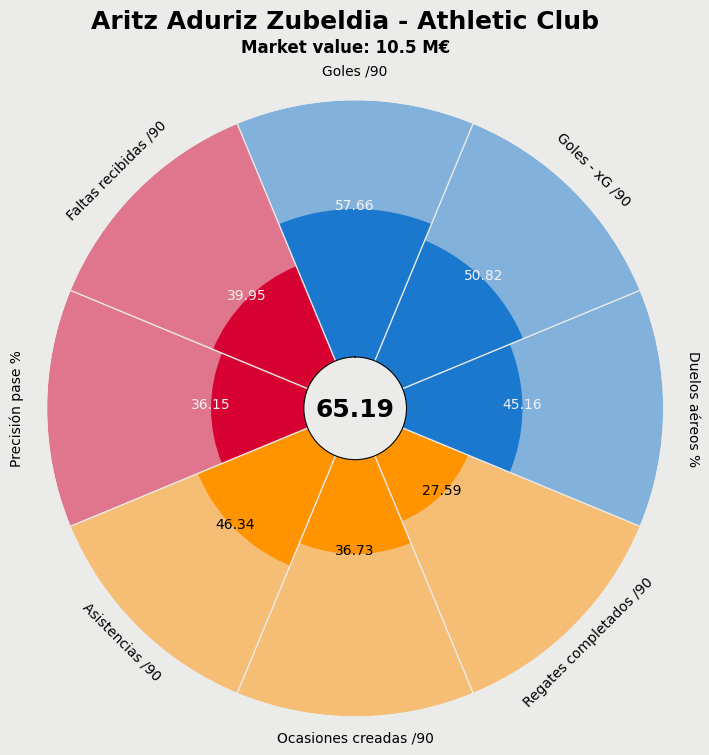

In [259]:
pizza_radar_jugador("Aritz Aduriz Zubeldia", df_minmax, df_total)

In [183]:
assert "Memphis Depay" in df_percentil['player_name'].values
print(df_total[df_total['player_name'] == "Memphis Depay"]['main_position'])


498    Left Wing
Name: main_position, dtype: object


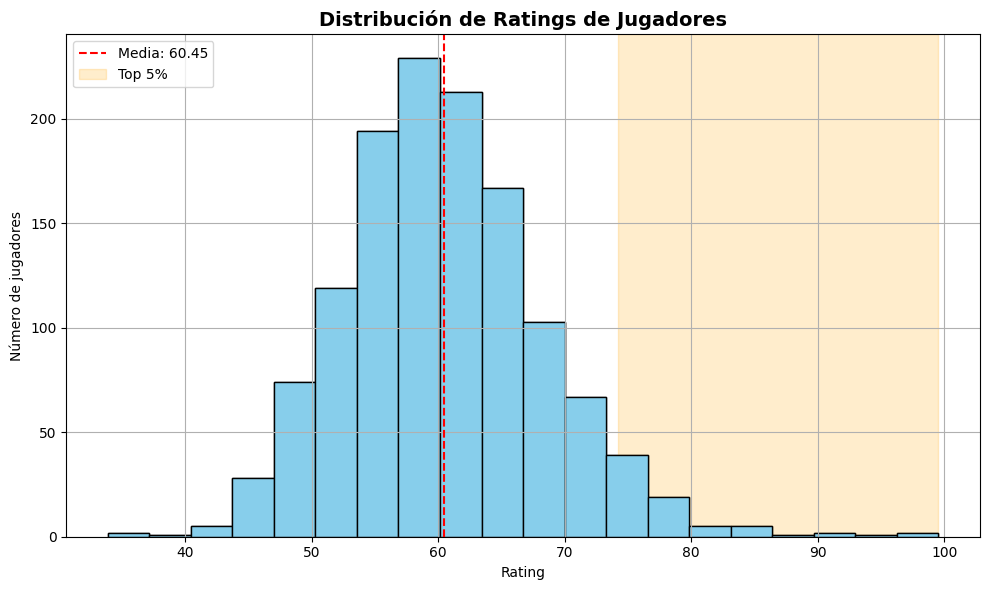

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que rating es numérico
df_total = df_total[df_total["rating"] != "S.V"].copy()
df_total["rating"] = pd.to_numeric(df_total["rating"], errors='coerce')

# Crear histograma de frecuencias
plt.figure(figsize=(10, 6))
plt.hist(df_total["rating"], bins=20, color="skyblue", edgecolor="black")

# Línea de media
plt.axvline(x=df_total["rating"].mean(), color='red', linestyle='--', label=f"Media: {df_total['rating'].mean():.2f}")

percentil_95 = df_total["rating"].quantile(0.95)
plt.axvspan(percentil_95, df_total["rating"].max(), color='orange', alpha=0.2, label='Top 5%')

counts, bins, patches = plt.hist(df_total["rating"], bins=20, color="skyblue", edgecolor="black")

# Estética
plt.title("Distribución de Ratings de Jugadores", fontsize=14, weight='bold')
plt.xlabel("Rating")
plt.ylabel("Número de jugadores")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [288]:
from mplsoccer import PyPizza
import matplotlib.pyplot as plt

def pizza_comparativa_minmax_percentil(player_name, df_percentiles, df_minmax, df_total):
    etiquetas_posiciones = {
        "goalkeeper": ["Goalkeeper"],
        "center_back": ['Center Back', 'Right Center Back', 'Left Center Back'],
        "side_back": ['Left Back', 'Right Back', 'Right Wing Back', 'Left Wing Back'],
        "defensive_midfield": ['Right Defensive Midfield', 'Center Defensive Midfield', 'Left Defensive Midfield'],
        "center_midfield": ['Right Center Midfield', 'Center Midfield', 'Left Center Midfield'],
        "offensive_midfield": ['Left Attacking Midfield', 'Center Attacking Midfield', 'Right Attacking Midfield'],
        "winger": ['Left Wing', 'Left Midfield', 'Right Wing', 'Right Midfield'],
        "striker": ['Center Forward', 'Secondary Striker', 'Left Center Forward', 'Right Center Forward']
    }


        # Mapear cada tipo de posición a columnas y etiquetas del radar
    radar_config = {
        "goalkeeper": (
            ["saves_per90", "save_percentage", "xg_against_minus_goals_conceded_per90",
            "keeper_sweeper_per90", "penalty_save_percentage", "aerial_dominance_index_per90",
             "pass_completion_rate"],
            ["Paradas /90", "Porcentaje paradas", "xG - Goles /90", "Sweeper /90", "Penaltis detenidos %",
            "Dominio aéreo", "Precisión pase %"]
        ),
        "center_back": (
            ["tackles_successful_per90", "interceptions_per90", "clearances_per90",
            "blocks_per90", "times_dribbled_past_per90", "progressive_passes_per90",
            "duel_success_rate", "goals_scored_per90"],
            ["Tackles exitosos /90", "Intercepciones /90", "Despejes /90", "Bloqueos /90", "Regates sufridos /90",
            "Pases progresivos /90", "Duelos ganados %", "Goles /90"]
        ),
        "side_back": (
            ["interception_success_rate", "pressures_per90", "duels_won_per90", "tackles_successful_per90",
            "progressive_carries_per90", "chances_created_per90", "goals_scored_per90", "fouls_committed_per90"],
            ["Intercepciones %", "Presiones /90", "Duelos ganados /90", "Tackles exitosos /90",
            "Conducciones progresivas /90", "Ocasiones creadas /90", "Goles /90", "Faltas cometidas /90"]
        ),
        "defensive_midfield": (
            ["ball_recoveries_per90", "duels_won_per90", "duel_success_rate", "interceptions_per90",
            "pass_completion_rate", "progressive_passes_per90", "chances_created_per90", "fouls_committed_per90"],
            ["Recuperaciones /90", "Duelos ganados /90", "Duelos ganados %", "Intercepciones /90",
            "Precisión pase %", "Pases progresivos /90", "Ocasiones creadas /90", "Faltas cometidas /90"]
        ),
        "center_midfield": (
            ["duels_won_per90", "pressures_per90", "dribble_success_rate", "pass_completion_rate",
            "progressive_passes_per90", "chances_created_per90", "goal_assists_per90", "goals_scored_per90"],
            ["Duelos ganados /90", "Presiones /90", "Éxito regate %", "Precisión pase %",
            "Pases progresivos /90", "Ocasiones creadas /90", "Asistencias /90", "Goles /90"]
        ),
        "offensive_midfield": (
            ["pass_completion_rate", "goal_assists_per90", "chances_created_per90", "dribbles_completed_per90",
            "dribble_success_rate", "progressive_passes_per90", "fouls_won_per90", "goals_scored_per90"],
            ["Precisión pase %", "Asistencias /90", "Ocasiones creadas /90", "Regates completados /90",
            "Éxito regate %", "Pases progresivos /90", "Faltas recibidas /90", "Goles /90"]
        ),
        "winger": (
            ["dribbles_completed_per90", "dribble_success_rate", "progressive_carries_per90", "chances_created_per90",
            "goal_assists_per90", "goals_scored_per90", "goals_minus_xg_per90", "fouls_won_per90"],
            ["Regates completados /90", "Éxito regate %", "Conducciones progresivas /90", "Ocasiones creadas /90",
            "Asistencias /90", "Goles /90", "Goles - xG /90", "Faltas recibidas /90"]
        ),
        "striker": (
            ["goals_scored_per90", "goals_minus_xg_per90", "headed_shot_duel_rate", "dribbles_completed_per90",
            "chances_created_per90", "goal_assists_per90", "pass_completion_rate", "fouls_won_per90"],
            ["Goles /90", "Goles - xG /90", "Duelos aéreos %", "Regates completados /90", "Ocasiones creadas /90",
            "Asistencias /90", "Precisión pase %", "Faltas recibidas /90"]
        )
    }

    # Obtener datos del jugador
    row = df_total[df_total["player_name"] == player_name].iloc[0]
    position_label = row["main_position"]
    team = row["team"]
    rating = round(float(row["rating"]), 2) if str(row["rating"]).replace('.', '', 1).isdigit() else "S.V"
    market_value = round(row["value_eur"] / 1_000_000, 2)

    # Detectar el rol
    rol = next((key for key, etiquetas in etiquetas_posiciones.items() if position_label in etiquetas), None)
    if rol not in radar_config:
        raise ValueError(f"No se ha definido radar para la posición: {position_label} (rol: {rol})")

    columnas, labels = radar_config[rol]

    # Obtener valores normalizados
    vals_percentil = df_percentiles[df_percentiles["player_name"] == player_name][columnas].iloc[0].tolist()
    vals_minmax = df_minmax[df_minmax["player_name"] == player_name][columnas].iloc[0].tolist()

    vals_percentil = [int(round(v)) for v in vals_percentil]  # ← sin decimales
    vals_minmax = [int(round(v)) for v in vals_minmax]

    # Crear gráfico
    baker = PyPizza(
        params=labels,
        background_color="#EBEBE9",
        straight_line_color="#EBEBE9",
        straight_line_lw=1,
        last_circle_lw=0,
        other_circle_lw=0,
        inner_circle_size=20
    )

    fig, ax = baker.make_pizza(
        vals_percentil,
        compare_values=vals_minmax,
        figsize=(8, 8),
        color_blank_space="same",
        slice_colors=["#1A78CF"] * len(labels),
        value_colors=["#000000"] * len(labels),

        compare_value_colors=["#FFFFFF"] * len(labels)
,
        param_location=110
    )

    # Añadir textos
    fig.text(0.5, 0.97, f"{player_name} - {team}", size=18, weight='bold', ha='center')
    fig.text(0.5, 0.94, f"Valor de mercado: {market_value} M€", size=12, ha='center')
    #fig.text(0.5125, 0.485, f"{rating}", size=18, weight='bold', ha='center')

    # Leyenda manual
    fig.text(0.02, 0.02, "● Percentil", color="#1A78CF", weight="bold", fontsize=10)
    fig.text(0.02, 0.05, "● Min-Max", color="#2ca02c", weight="bold", fontsize=10)

    plt.show()


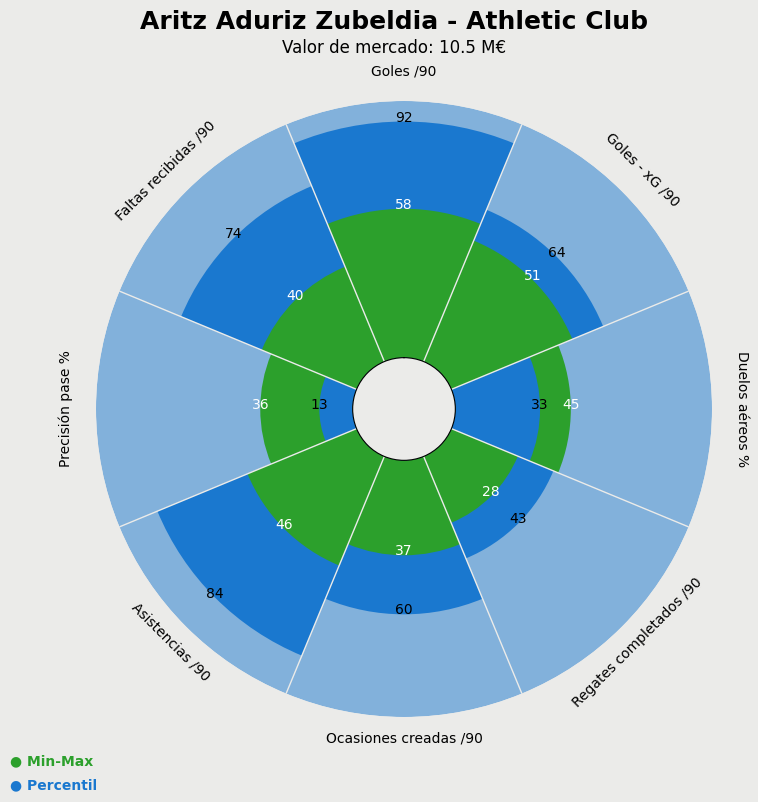

In [289]:
pizza_comparativa_minmax_percentil("Aritz Aduriz Zubeldia", df_percentil, df_minmax, df_total)